In [80]:
import numpy as np
import pandas as pd
from datetime import datetime
import calendar
from datetime import timedelta
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [30]:
!pip3 install geopy

     |████████████████████████████████| 102kB 731kB/s ta 0:00:01


In [20]:
train = pd.read_csv("./iiitb2019nyctaxifare/train.csv/train.csv", nrows = 400000)

In [21]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-10-20 23:26:26.0000003,4.5,2010-10-20 23:26:26 UTC,-73.986910,40.739538,-73.991381,40.745614,2
1,2009-12-30 10:56:00.00000075,4.1,2009-12-30 10:56:00 UTC,-73.961572,40.760283,-73.957438,40.769387,5
2,2012-07-20 11:24:00.00000022,6.1,2012-07-20 11:24:00 UTC,-73.979437,40.746517,-73.984195,40.732117,1
3,2011-05-31 11:29:00.000000136,4.9,2011-05-31 11:29:00 UTC,-73.964097,40.792508,-73.976422,40.785767,1
4,2010-05-25 17:57:00.000000145,6.5,2010-05-25 17:57:00 UTC,-74.003943,40.725670,-73.988915,40.748370,1


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 8 columns):
key                  400000 non-null object
fare_amount          400000 non-null float64
pickup_datetime      400000 non-null object
pickup_longitude     400000 non-null float64
pickup_latitude      400000 non-null float64
dropoff_longitude    399997 non-null float64
dropoff_latitude     399997 non-null float64
passenger_count      400000 non-null int64
dtypes: float64(5), int64(1), object(2)
memory usage: 24.4+ MB


In [23]:
train['pickup_datetime']=pd.to_datetime(train['pickup_datetime'],format='%Y-%m-%d %H:%M:%S UTC')
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-10-20 23:26:26.0000003,4.5,2010-10-20 23:26:26,-73.986910,40.739538,-73.991381,40.745614,2
1,2009-12-30 10:56:00.00000075,4.1,2009-12-30 10:56:00,-73.961572,40.760283,-73.957438,40.769387,5
2,2012-07-20 11:24:00.00000022,6.1,2012-07-20 11:24:00,-73.979437,40.746517,-73.984195,40.732117,1
3,2011-05-31 11:29:00.000000136,4.9,2011-05-31 11:29:00,-73.964097,40.792508,-73.976422,40.785767,1
4,2010-05-25 17:57:00.000000145,6.5,2010-05-25 17:57:00,-74.003943,40.725670,-73.988915,40.748370,1


In [24]:
from datetime import datetime
import calendar
from datetime import timedelta
import datetime as dt

In [25]:
train['pickup_date']= train['pickup_datetime'].dt.date
train['pickup_day']=train['pickup_datetime'].apply(lambda x:x.day)
train['pickup_hour']=train['pickup_datetime'].apply(lambda x:x.hour)
train['pickup_day_of_week']=train['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
train['pickup_month']=train['pickup_datetime'].apply(lambda x:x.month)
train['pickup_year']=train['pickup_datetime'].apply(lambda x:x.year)

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390181 entries, 0 to 399999
Data columns (total 16 columns):
key                   390181 non-null object
fare_amount           390181 non-null float64
pickup_datetime       390181 non-null datetime64[ns]
pickup_longitude      390181 non-null float64
pickup_latitude       390181 non-null float64
dropoff_longitude     390181 non-null float64
dropoff_latitude      390181 non-null float64
passenger_count       390181 non-null int64
pickup_date           390181 non-null object
pickup_day            390181 non-null int64
pickup_hour           390181 non-null int64
pickup_day_of_week    390181 non-null int64
pickup_month          390181 non-null int64
pickup_year           390181 non-null int64
distance              390181 non-null float64
trip_distance         390181 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(6), object(2)
memory usage: 50.6+ MB


In [26]:
# removing outliers in latitude and longitude
misplaced_locations = 0
misplaced_locations_index = []

for i, val in enumerate(zip(train.pickup_latitude,train.dropoff_latitude,train.pickup_longitude,train.dropoff_longitude)):
    
    #print(val)
    #break
    
    lat1,lat2,lon1,lon2 = val
    #co_ords1 = (lat1, lon1)
    #co_ords2 = (lat2, lon2)
    
    if lat1 < 40.5 or lat1 > 41.8 or lat2 < 40.5 or lat2 > 41.8 or lon1 < -74.5 or lon1 > -72.8 or lon2 < -74.5 or lon2 > -72.8:
        misplaced_locations += 1
        misplaced_locations_index.append(i)
        
    
print(misplaced_locations)


8420


In [27]:
train = train.drop(misplaced_locations_index)

In [28]:
train = train.dropna()

In [31]:
import geopy.distance
for val in zip(train.pickup_latitude,train.dropoff_latitude,train.pickup_longitude,train.dropoff_longitude):
    
    #print(val)
    #break
    
    lat1,lat2,lon1,lon2 = val
    co_ords1 = (lat1, lon1)
    co_ords2 = (lat2, lon2)
    
    train['distance'] = geopy.distance.distance(co_ords1, co_ords2).km

In [33]:
train.head(100)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,distance
0,2010-10-20 23:26:26.0000003,4.5,2010-10-20 23:26:26,-73.986910,40.739538,-73.991381,40.745614,2,2010-10-20,20,23,Wednesday,10,2010,5.344438
1,2009-12-30 10:56:00.00000075,4.1,2009-12-30 10:56:00,-73.961572,40.760283,-73.957438,40.769387,5,2009-12-30,30,10,Wednesday,12,2009,5.344438
2,2012-07-20 11:24:00.00000022,6.1,2012-07-20 11:24:00,-73.979437,40.746517,-73.984195,40.732117,1,2012-07-20,20,11,Friday,7,2012,5.344438
3,2011-05-31 11:29:00.000000136,4.9,2011-05-31 11:29:00,-73.964097,40.792508,-73.976422,40.785767,1,2011-05-31,31,11,Tuesday,5,2011,5.344438
4,2010-05-25 17:57:00.000000145,6.5,2010-05-25 17:57:00,-74.003943,40.725670,-73.988915,40.748370,1,2010-05-25,25,17,Tuesday,5,2010,5.344438
5,2011-08-06 07:39:00.00000044,7.7,2011-08-06 07:39:00,-73.948613,40.785482,-73.974833,40.764653,1,2011-08-06,6,7,Saturday,8,2011,5.344438
6,2010-07-05 19:48:00.00000084,10.5,2010-07-05 19:48:00,-73.975158,40.758942,-73.997378,40.719215,2,2010-07-05,5,19,Monday,7,2010,5.344438
7,2010-05-19 20:48:46.0000004,10.1,2010-05-19 20:48:46,-73.979707,40.760635,-73.970936,40.796903,1,2010-05-19,19,20,Wednesday,5,2010,5.344438
8,2010-12-22 10:55:13.0000002,19.7,2010-12-22 10:55:13,-73.961118,40.760891,-73.958942,40.699055,1,2010-12-22,22,10,Wednesday,12,2010,5.344438
9,2010-11-06 13:09:00.000000186,3.7,2010-11-06 13:09:00,-74.010327,40.718277,-74.009195,40.722158,5,2010-11-06,6,13,Saturday,11,2010,5.344438


In [34]:
train = train.drop(train[train['passenger_count'] <= 0].index.tolist())

In [35]:
train = train.drop(train[train['fare_amount'] <= 0].index.tolist())

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

(-74.03, -73.75)

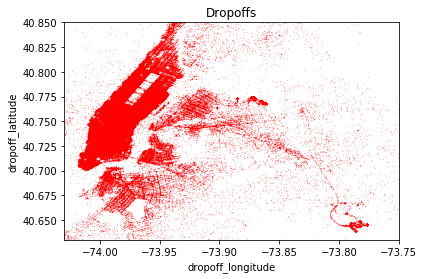

In [37]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

train.plot(kind='scatter', x='dropoff_longitude', y='dropoff_latitude',
                color='red', 
                s=.02, alpha=.6)
plt.title("Dropoffs")

plt.ylim(city_lat_border)
plt.xlim(city_long_border)

(-74.03, -73.75)

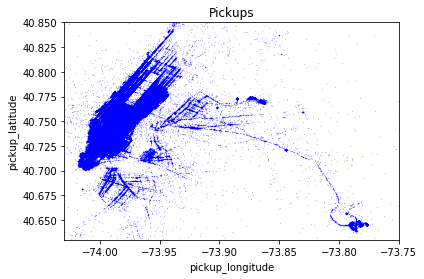

In [38]:
train.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude',
                color='blue', 
                s=.02, alpha=.6)
plt.title("Pickups")

plt.ylim(city_lat_border)
plt.xlim(city_long_border)

In [39]:
#calculate trip distance in miles
def distance(lat1, lat2, lon1,lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

In [40]:
train['trip_distance']=train.apply(lambda row:distance(row['pickup_latitude'],row['dropoff_latitude'],row['pickup_longitude'],row['dropoff_longitude']),axis=1)

In [41]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,distance,trip_distance
0,2010-10-20 23:26:26.0000003,4.5,2010-10-20 23:26:26,-73.986910,40.739538,-73.991381,40.745614,2,2010-10-20,20,23,Wednesday,10,2010,5.344438,0.480646
1,2009-12-30 10:56:00.00000075,4.1,2009-12-30 10:56:00,-73.961572,40.760283,-73.957438,40.769387,5,2009-12-30,30,10,Wednesday,12,2009,5.344438,0.665188
2,2012-07-20 11:24:00.00000022,6.1,2012-07-20 11:24:00,-73.979437,40.746517,-73.984195,40.732117,1,2012-07-20,20,11,Friday,7,2012,5.344438,1.025650
3,2011-05-31 11:29:00.000000136,4.9,2011-05-31 11:29:00,-73.964097,40.792508,-73.976422,40.785767,1,2011-05-31,31,11,Tuesday,5,2011,5.344438,0.795377
4,2010-05-25 17:57:00.000000145,6.5,2010-05-25 17:57:00,-74.003943,40.725670,-73.988915,40.748370,1,2010-05-25,25,17,Tuesday,5,2010,5.344438,1.754687


Text(0.5, 1.0, 'Trip Distance vs Fare Amount')

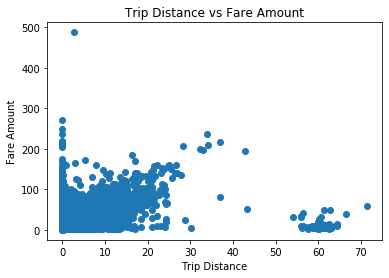

In [42]:
plt.scatter(x=train['trip_distance'],y=train['fare_amount'])
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.title("Trip Distance vs Fare Amount")

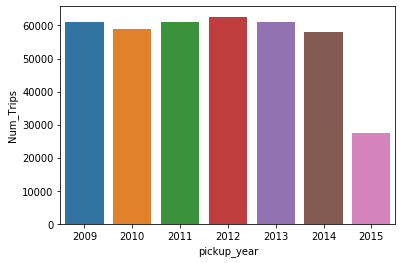

In [43]:
trips_year=train.groupby(['pickup_year'])['key'].count().reset_index().rename(columns={'key':'Num_Trips'})
trips_year.head()
sns.barplot(x='pickup_year',y='Num_Trips',data=trips_year)

In [44]:
trips_year_fareamount=train.groupby(['pickup_year'])['fare_amount'].mean().reset_index().rename(columns={'fare_amount':'avg_fare_amount'})

Text(0.5, 1.0, 'Avg Fare Amount over Years')

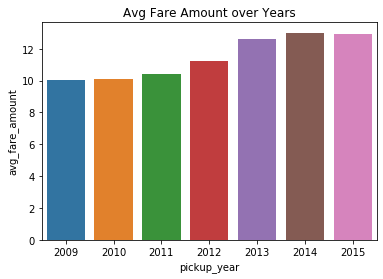

In [45]:
sns.barplot(x='pickup_year',y='avg_fare_amount',data=trips_year_fareamount).set_title("Avg Fare Amount over Years")

In [46]:
def groupandplot(data,groupby_key,value,aggregate='mean'):
    plt.figure(figsize=(16,10))
    agg_data=data.groupby([groupby_key])[value].agg(aggregate).reset_index().rename(columns={value:aggregate+'_'+value})
    plt.subplot(1,2,1)
    count_data=train.groupby([groupby_key])['key'].count().reset_index().rename(columns={'key':'Num_Trips'})
    sns.barplot(x=groupby_key,y='Num_Trips',data=count_data).set_title("Number of Trips vs "+groupby_key)
    
    plt.subplot(1,2,2)
    sns.barplot(x=groupby_key,y=aggregate+'_'+value,data=agg_data).set_title(aggregate+'_'+value+" vs "+groupby_key)


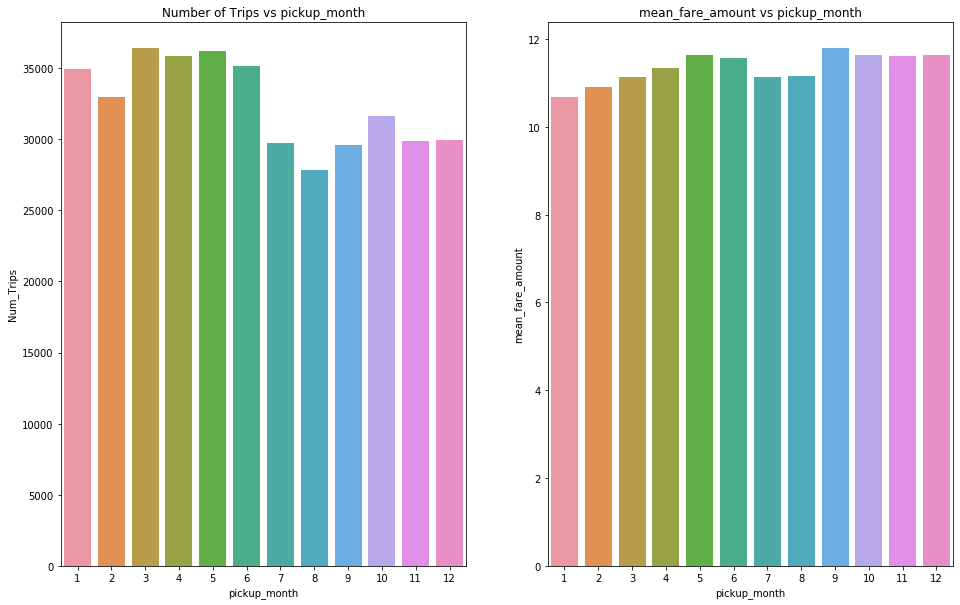

In [47]:
groupandplot(train,'pickup_month','fare_amount')

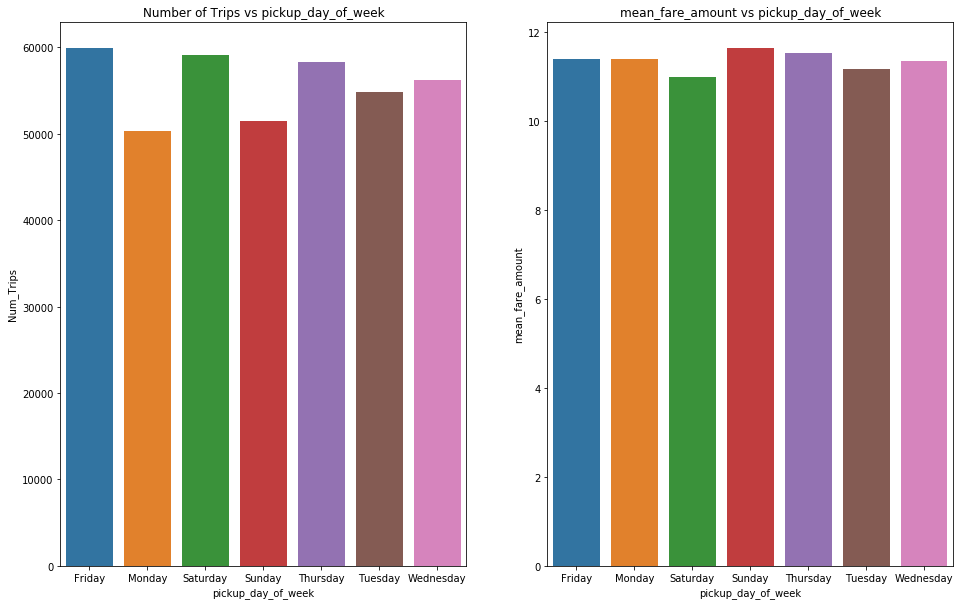

In [48]:
groupandplot(train,'pickup_day_of_week','fare_amount')

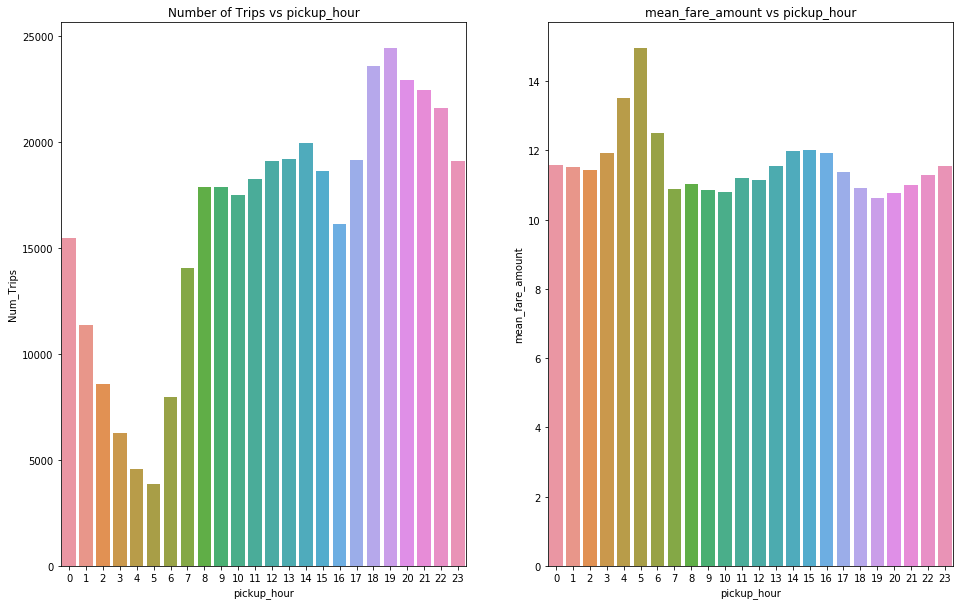

In [49]:
groupandplot(train,'pickup_hour','fare_amount')

In [50]:
# Let us encode day of the week to numbers
def encodeDays(day_of_week):
    day_dict={'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6}
    return day_dict[day_of_week]

In [51]:
train['pickup_day_of_week']=train['pickup_day_of_week'].apply(lambda x:encodeDays(x))

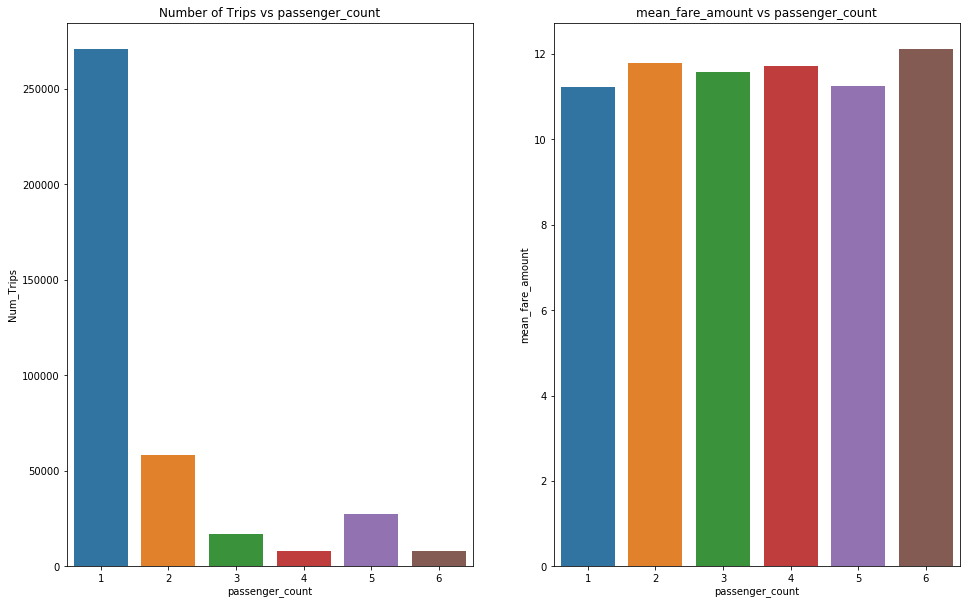

In [52]:
groupandplot(train,'passenger_count','fare_amount')

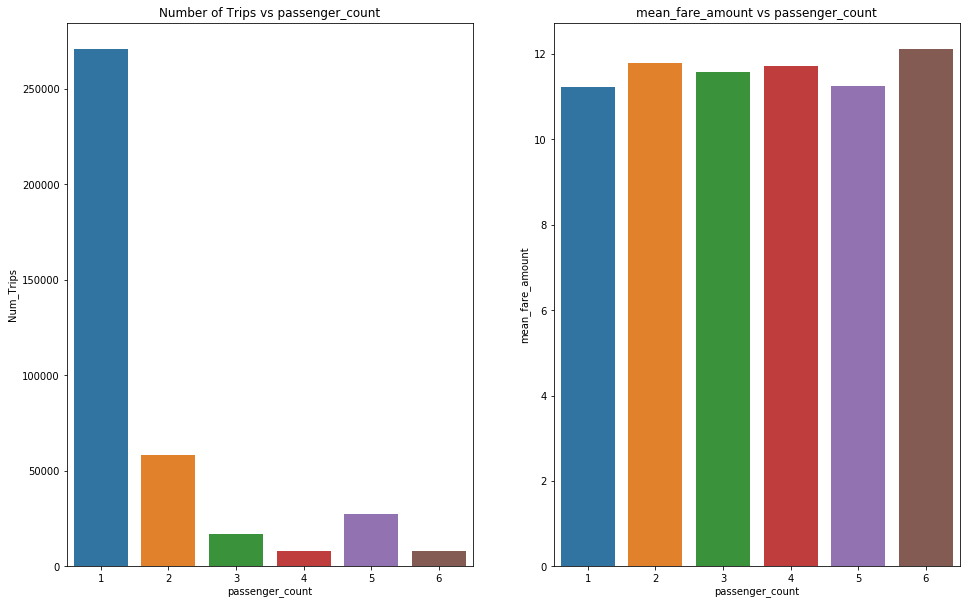

In [53]:
groupandplot(train,'passenger_count','fare_amount')

In [54]:
train.to_csv("train_cleaned.csv",index=False)

In [58]:
train.shape

(390181, 16)

In [60]:
train.info(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390181 entries, 0 to 399999
Data columns (total 16 columns):
key                   390181 non-null object
fare_amount           390181 non-null float64
pickup_datetime       390181 non-null datetime64[ns]
pickup_longitude      390181 non-null float64
pickup_latitude       390181 non-null float64
dropoff_longitude     390181 non-null float64
dropoff_latitude      390181 non-null float64
passenger_count       390181 non-null int64
pickup_date           390181 non-null object
pickup_day            390181 non-null int64
pickup_hour           390181 non-null int64
pickup_day_of_week    390181 non-null int64
pickup_month          390181 non-null int64
pickup_year           390181 non-null int64
distance              390181 non-null float64
trip_distance         390181 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(6), object(2)
memory usage: 50.6+ MB


In [63]:
train = train.drop(columns=['key','pickup_datetime','distance','pickup_date'])

In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390181 entries, 0 to 399999
Data columns (total 12 columns):
fare_amount           390181 non-null float64
pickup_longitude      390181 non-null float64
pickup_latitude       390181 non-null float64
dropoff_longitude     390181 non-null float64
dropoff_latitude      390181 non-null float64
passenger_count       390181 non-null int64
pickup_day            390181 non-null int64
pickup_hour           390181 non-null int64
pickup_day_of_week    390181 non-null int64
pickup_month          390181 non-null int64
pickup_year           390181 non-null int64
trip_distance         390181 non-null float64
dtypes: float64(6), int64(6)
memory usage: 38.7 MB


In [70]:
def processDataForModelling(data,target,is_train=True,split=0.3):
    data_1=data
    # One hot Encoding
    data_1=pd.get_dummies(data_1)
    if is_train==True:
        X=data_1.drop([target],axis=1)
        y=data_1[target]
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=split,random_state=123)
        
        print("Shape of Training Features",X_train.shape)
        print("Shape of Validation Features ",X_test.shape)
        
        return X_train, X_test, y_train, y_test
    else:
        print ("Shape of Test Data",data_1.shape)
        return data_1

In [73]:
X_train, X_test, y_train, y_test=processDataForModelling(train,'fare_amount',is_train=True,split=0.2)

Shape of Training Features (312144, 11)
Shape of Validation Features  (78037, 11)


In [74]:
avg_fare=round(np.mean(y_train),2)
avg_fare

11.33

In [77]:
# Baseline Model
baseline_pred=np.repeat(avg_fare,y_test.shape[0])
baseline_rmse=np.sqrt(mean_squared_error(baseline_pred, y_test))
print("Basline RMSE of Validation data :",baseline_rmse)

Basline RMSE of Validation data : 9.762140179591256


In [78]:
# Linear Regression Model
lm = LinearRegression()
lm.fit(X_train,y_train)
y_pred=np.round(lm.predict(X_test),2)
lm_rmse=np.sqrt(mean_squared_error(y_pred, y_test))
print("RMSE for Linear Regression is ",lm_rmse)

RMSE for Linear Regression is  5.410930065232967


In [81]:
# Random Forest Model
rf = RandomForestRegressor(n_estimators = 100, random_state = 883,n_jobs=-1)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=883, verbose=0,
                      warm_start=False)

In [82]:
rf_pred= rf.predict(X_test)
rf_rmse=np.sqrt(mean_squared_error(rf_pred, y_test))
print("RMSE for Random Forest is ",rf_rmse)

RMSE for Random Forest is  4.093303358769356
